About this file
Title: Haberman's Survival Data

Sources:
(a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu)
(b) Date: March 4, 1999

Past Usage:

Haberman, S. J. (1976). Generalized Residuals for Log-Linear
Models, Proceedings of the 9th International Biometrics
Conference, Boston, pp. 104-122.
Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984),
Graphical Models for Assessing Logistic Regression Models (with
discussion), Journal of the American Statistical Association 79:
61-83.
Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis,
Department of Statistics, University of Wisconsin, Madison, WI.
Relevant Information:
The dataset contains cases from a study that was conducted between
1958 and 1970 at the University of Chicago's Billings Hospital on
the survival of patients who had undergone surgery for breast
cancer.

Number of Instances: 306

Number of Attributes: 4 (including the class attribute)

Attribute Information:

Age of patient at time of operation (numerical)
Patient's year of operation (year - 1900, numerical)
Number of positive axillary nodes detected (numerical)
Survival status (class attribute)
1 = the patient survived 5 years or longer
2 = the patient died within 5 year
Missing Attribute Values: None

# (3.12) Exercise:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load haberman data into a pandas dataFrame.
haberman = pd.read_csv("haberman.csv")

In [4]:
#how many data points and features
haberman.shape

(306, 4)

In [5]:
#columns names. I have entered the columns names
haberman.columns

Index(['Age', 'operation_year', 'axillary_nodes', 'Survival_status'], dtype='object')

In [6]:
#value counts for the individual survival status
haberman['Survival_status'].value_counts()

1    225
2     81
Name: Survival_status, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='operation_year'>

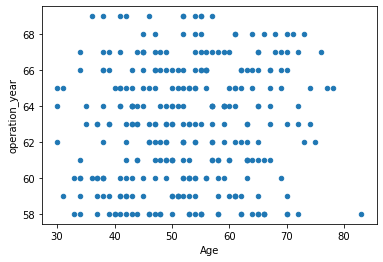

In [7]:
#2D scatter plot
haberman.plot(kind ='scatter', x='Age', y='operation_year')

<AxesSubplot:xlabel='Age', ylabel='axillary_nodes'>

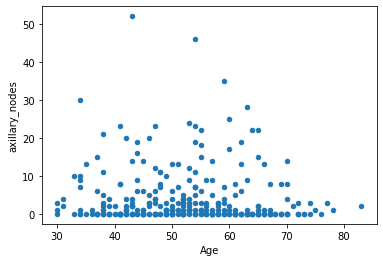

In [8]:
#2D scatter plot
haberman.plot(kind ='scatter', x='Age', y='axillary_nodes')

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


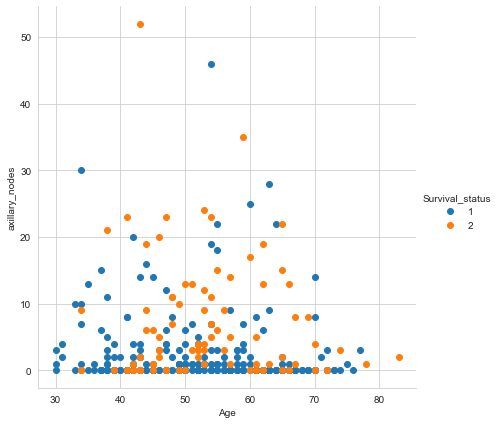

In [9]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid")
sns.FacetGrid(haberman,hue='Survival_status',size=6)\
    .map(plt.scatter, 'Age', 'axillary_nodes' )\
    .add_legend()
plt.show();
#points on the survival status are over lapping its not possible to linearly separate them by using the age and axilalry_nodes

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


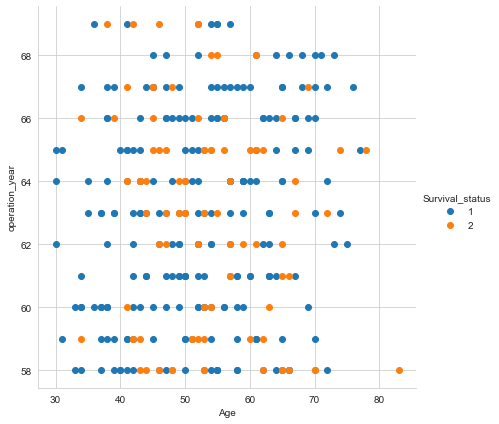

In [10]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid")
sns.FacetGrid(haberman,hue='Survival_status',size=6)\
    .map(plt.scatter, 'Age', 'operation_year' )\
    .add_legend()
plt.show();


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


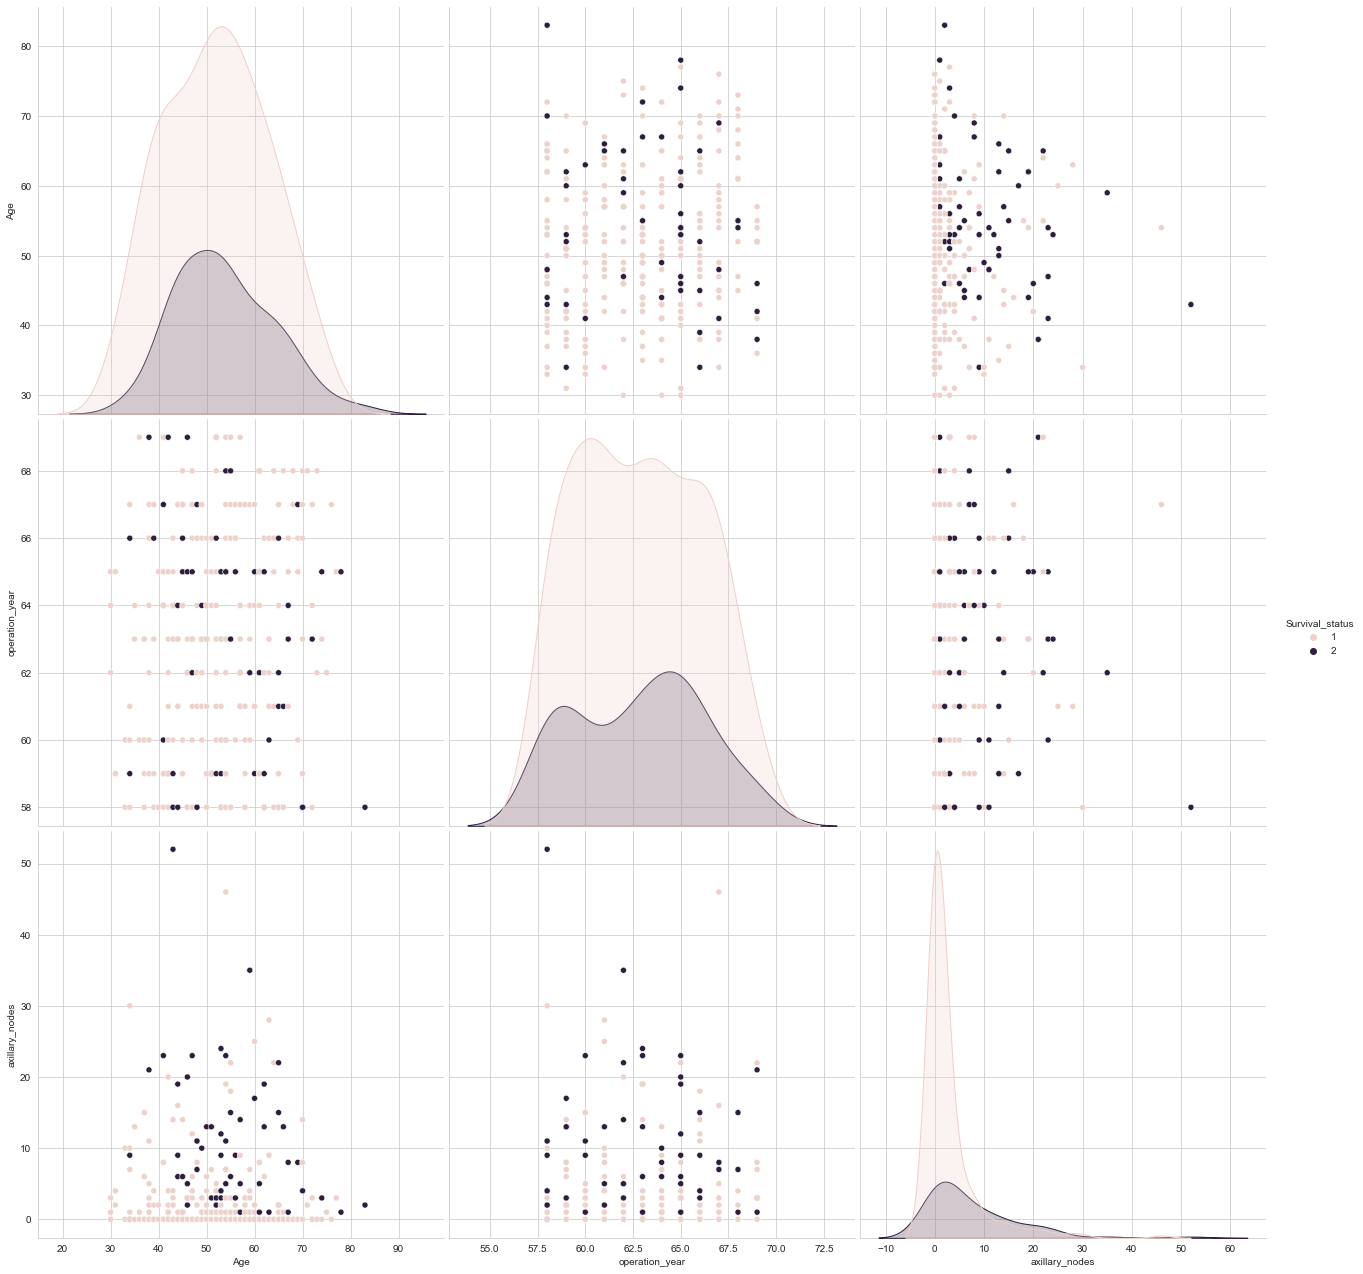

In [11]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
#plt.close()
sns.set_style('whitegrid')
sns.pairplot(haberman, hue='Survival_status', size=6);
plt.show()

In [12]:
haberman.head()

,Age,operation_year,axillary_nodes,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [20]:
status_1 = haberman.loc[haberman['Survival_status']==1]
status_2 = haberman.loc[haberman['Survival_status']==2]

In [19]:
status_1.shape

(225, 4)

In [21]:
status_2 = haberman.loc[haberman['Survival_status']==2]

In [22]:
status_2.shape

(81, 4)

In [23]:
225+81

306

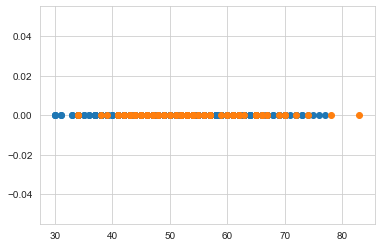

In [32]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of petal-length
plt.plot(status_1['Age'], np.zeros_like(status_1['Age']), 'o')
plt.plot(status_2['Age'], np.zeros_like(status_2['Age']), 'o')
plt.show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots?

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


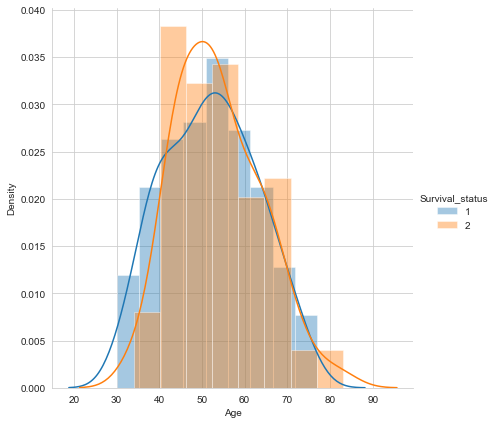

In [45]:
sns.FacetGrid(haberman, hue = 'Survival_status', size = 6)\
    .map(sns.distplot, 'Age')\
    .add_legend();

In [46]:
haberman.columns

Index(['Age', 'operation_year', 'axillary_nodes', 'Survival_status'], dtype='object')

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


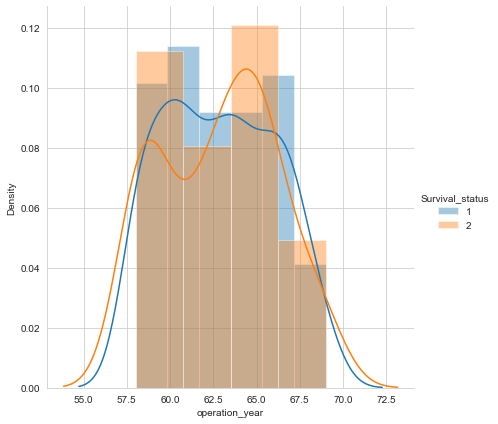

In [47]:
sns.FacetGrid(haberman, hue = 'Survival_status', size = 6)\
    .map(sns.distplot, 'operation_year')\
    .add_legend();

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


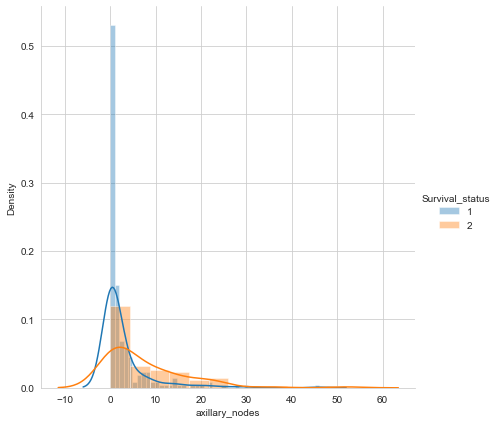

In [48]:
sns.FacetGrid(haberman, hue = 'Survival_status', size = 6)\
    .map(sns.distplot, 'axillary_nodes')\
    .add_legend();

In [ ]:
# Histograms and Probability Density Functions (PDF) using KDE
# How to compute PDFs using counts/frequencies of data points in each window.
# How window width effects the PDF plot.


# Interpreting a PDF:
## why is it called a density plot?
## Why is it called a probability plot?
## for each value of petal_length, what does the value on y-axis mean?
# Notice that we can write a simple if..else condition as if(petal_length) < 2.5 then flower type is setosa.
# Using just one feature, we can build a simple "model" suing if..else... statements.

# Disadv of PDF: Can we say what percentage of versicolor points have a petal_length of less than 5?

# Do some of these plots look like a bell-curve you studied in under-grad?
# Gaussian/Normal distribution.
# What is "normal" about normal distribution?
# e.g: Hieghts of male students in a class.
# One of the most frequent distributions in nature.

[12 24 28 21 37 37 21 25 14  6]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]


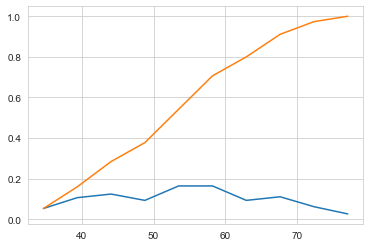

In [67]:
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of class 2 patients are having the age less than 50 
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length
counts, binedges = np.histogram(status_1['Age'], bins=10, density = False)
print (counts)
print (binedges)
pdf = counts/sum(counts)
print (pdf)
cdf = np.cumsum(pdf)
plt.plot(binedges[1:], pdf)
plt.plot(binedges[1:], cdf)


#counts, binedges = np.histogram(status_1['Age'], bins=20, density = False)
#print (counts)
#print (binedges)
#pdf = counts/sum(counts)
#plt.plot(binedges[1:], pdf)

In [68]:
print (cdf)

[0.05333333 0.16       0.28444444 0.37777778 0.54222222 0.70666667
 0.8        0.91111111 0.97333333 1.        ]


In [69]:
type(binedges)

numpy.ndarray

In [72]:
len(binedges)

11

In [70]:
type(pdf)

numpy.ndarray

In [71]:
len(pdf)

10

In [60]:
status_1['Age'].min()

30

In [61]:
status_1['Age'].max()

77

In [62]:
34.7-30

4.700000000000003

In [63]:
44.1-39.4

4.700000000000003

In [64]:
77-30

47

[12 24 28 21 37 37 21 25 14  6]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[ 3 10 16 16 11 10  8  4  2  1]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]


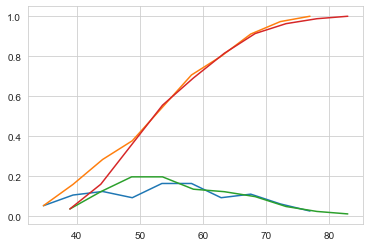

In [74]:
#Plot CDF of petal_length
#for the patients with the status 1
counts, binedges = np.histogram(status_1['Age'], bins=10, density = False)
print (counts)
print (binedges)
pdf = counts/sum(counts)
print (pdf)
cdf = np.cumsum(pdf)
plt.plot(binedges[1:], pdf)
plt.plot(binedges[1:], cdf)

#for the patients with the status 2
counts, binedges = np.histogram(status_2['Age'], bins=10, density = False)
print (counts)
print (binedges)
pdf = counts/sum(counts)
print (pdf)
cdf = np.cumsum(pdf)
plt.plot(binedges[1:], pdf)
plt.plot(binedges[1:], cdf)



In [76]:
haberman.columns

Index(['Age', 'operation_year', 'axillary_nodes', 'Survival_status'], dtype='object')

[42 24 23 16 22 23 15 22 21 17]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[21  4  3  7  8  8 13  6  4  7]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]


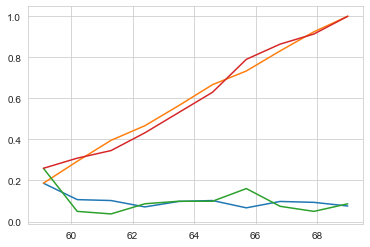

In [77]:
#Plot CDF of petal_length
#for the patients with the status 1
counts, binedges = np.histogram(status_1['operation_year'], bins=10, density = False)
print (counts)
print (binedges)
pdf = counts/sum(counts)
print (pdf)
cdf = np.cumsum(pdf)
plt.plot(binedges[1:], pdf)
plt.plot(binedges[1:], cdf)

#for the patients with the status 2
counts, binedges = np.histogram(status_2['operation_year'], bins=10, density = False)
print (counts)
print (binedges)
pdf = counts/sum(counts)
print (pdf)
cdf = np.cumsum(pdf)
plt.plot(binedges[1:], pdf)
plt.plot(binedges[1:], cdf)

[188  18   5   6   4   1   2   0   0   1]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[46 12 11  4  6  0  1  0  0  1]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]


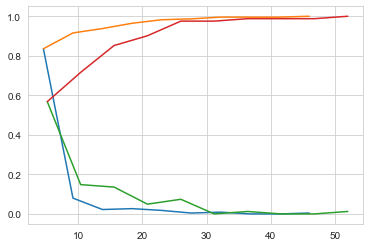

In [81]:
#Plot CDF of petal_length
#for the patients with the status 1
counts, binedges = np.histogram(status_1['axillary_nodes'], bins=10, density = False)
print (counts)
print (binedges)
pdf = counts/sum(counts)
print (pdf)
cdf = np.cumsum(pdf)
plt.plot(binedges[1:], pdf)
plt.plot(binedges[1:], cdf)

#for the patients with the status 2
counts, binedges = np.histogram(status_2['axillary_nodes'], bins=10, density = False)
print (counts)
print (binedges)
pdf = counts/sum(counts)
print (pdf)
cdf = np.cumsum(pdf)
plt.plot(binedges[1:], pdf)
plt.plot(binedges[1:], cdf)

In [82]:
haberman.head()

,Age,operation_year,axillary_nodes,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [84]:
haberman.tail()

,Age,operation_year,axillary_nodes,Survival_status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [87]:
haberman.columns

Index(['Age', 'operation_year', 'axillary_nodes', 'Survival_status'], dtype='object')

# (3.5) Mean, Variance and Std-dev

In [94]:
#Mean, Variance, Std-deviation,  
print ("#Mean, Variance, Std-deviation,  for status_1 points")
print("Means:")
print(np.mean(status_1["Age"]))
print(np.mean(status_1["operation_year"]))
print(np.mean(status_1["axillary_nodes"]))
print(np.mean(status_1["Survival_status"]))
print("\nStd-dev:")
print(np.std(status_1["Age"]))
print(np.std(status_1["operation_year"]))
print(np.std(status_1["axillary_nodes"]))
print(np.std(status_1["Survival_status"]))


#Mean, Variance, Std-deviation,  for status_1 points
Means:
52.01777777777778
62.86222222222222
2.7911111111111113
1.0

Std-dev:
10.98765547510051
3.2157452144021956
5.857258449412131
0.0


In [108]:
#Mean, Variance, Std-deviation,  
print ("#Mean, Variance, Std-deviation,  for status_2 points")
print("Means:")
print(np.mean(status_2["Age"]))
print(np.mean(status_2["operation_year"]))
print(np.mean(status_2["axillary_nodes"]))
print(np.mean(status_2["Survival_status"]))
print("\nStd-dev:")
print(np.std(status_2["Age"]))
print(np.std(status_2["operation_year"]))
print(np.std(status_2["axillary_nodes"]))
print(np.std(status_2["Survival_status"]))

#Mean, Variance, Std-deviation,  for status_2 points
Means:
53.67901234567901
62.82716049382716
7.45679012345679
2.0

Std-dev:
10.10418219303131
3.3214236255207883
9.128776076761632
0.0


# (3.6) Median, Percentile, Quantile, IQR, MAD

In [97]:
print ("# (3.6) Median, Percentile, Quantile, IQR, MAD")
print("Median:")
print(np.median(status_1["Age"]))
print(np.median(status_1["operation_year"]))
print(np.median(status_1["axillary_nodes"]))
print(np.median(status_1["Survival_status"]))

# (3.6) Median, Percentile, Quantile, IQR, MAD
Median:
52.0
63.0
0.0
1.0


In [106]:
status_1["axillary_nodes"].shape

(225,)

In [113]:
print("\nQuantiles:")
print(np.percentile(status_1["Age"],np.arange(0, 101, 25)))
print(np.percentile(status_1["operation_year"],np.arange(0, 101, 25)))
print(np.percentile(status_1["axillary_nodes"], np.arange(0, 101, 25)))
print(np.percentile(status_1["Survival_status"], np.arange(0, 101, 25)))


Quantiles:
[30. 43. 52. 60. 77.]
[58. 60. 63. 66. 69.]
[ 0.  0.  0.  3. 46.]
[1. 1. 1. 1. 1.]


In [134]:
print("\n90TH Percentiles:")
print(np.percentile(status_1["Age"], 90))
print(np.percentile(status_1["operation_year"],90))
print(np.percentile(status_1["axillary_nodes"], 90))
print(np.percentile(status_1["Survival_status"], 90))


90TH Percentiles:
67.0
67.0
8.0
1.0


In [135]:
print("\n65TH Percentiles:")
print(np.percentile(status_1["Age"], 65))
print(np.percentile(status_1["operation_year"],65))
print(np.percentile(status_1["axillary_nodes"], 65))
print(np.percentile(status_1["Survival_status"], 65))


65TH Percentiles:
57.0
64.0
1.0
1.0


In [138]:
print("\n65TH Percentiles:")
print(np.percentile(status_1["Age"], [65,25,12,15]))
print(np.percentile(status_1["operation_year"],[65,9,5,96]))
print(np.percentile(status_1["axillary_nodes"], [65,25,45]))
print(np.percentile(status_1["Survival_status"], [65,29]))


65TH Percentiles:
[57. 43. 38. 39.]
[64. 58. 58. 68.]
[1. 0. 0.]
[1. 1.]


In [141]:
from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(status_1["Age"]))
print(robust.mad(status_1["operation_year"]))
print(robust.mad(status_1["axillary_nodes"]))
print(robust.mad(status_1["Survival_status"]))


Median Absolute Deviation
13.343419966550417
4.447806655516806
0.0
0.0


# (3.7) Box plot and Whiskers

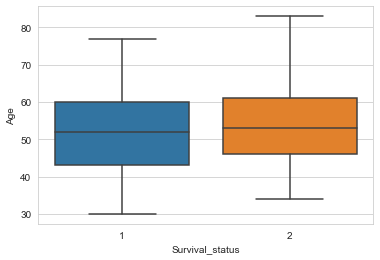

In [145]:

#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='Survival_status', y='Age', data=haberman)
plt.show()

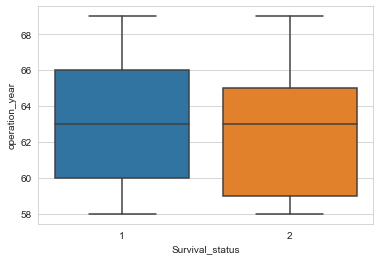

In [148]:

sns.boxplot(x='Survival_status', y='operation_year', data=haberman)
plt.show()

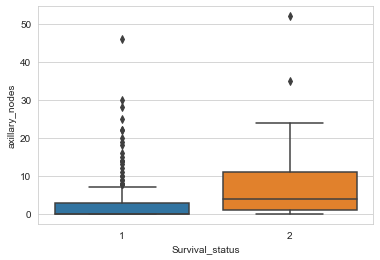

In [149]:
sns.boxplot(x='Survival_status', y='axillary_nodes', data=haberman)
plt.show()

# (3.8) Violin plots

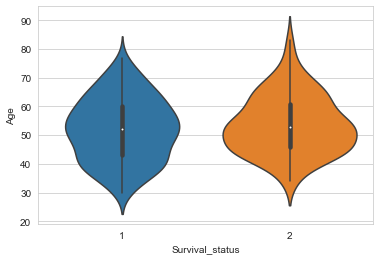

In [147]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x='Survival_status', y='Age', data=haberman)
plt.show()

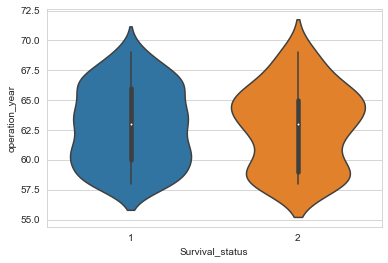

In [150]:
sns.violinplot(x='Survival_status', y='operation_year', data=haberman)
plt.show()

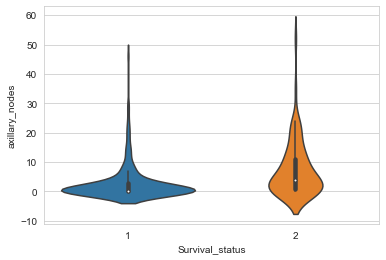

In [151]:
sns.violinplot(x='Survival_status', y='axillary_nodes', data=haberman)
plt.show()

In [119]:
print(np.percentile(status_1["Age"],np.arange(0, 101, 25)))

[30. 43. 52. 60. 77.]


In [117]:
status_1["operation_year"].min()

58

In [107]:
np.arange(0, 100, 25)

array([ 0, 25, 50, 75])

In [128]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])